In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bandit problem with negative average reward

In [12]:
mu, sigma = 0, 1.0 # mean and standard deviation
np.random.seed(20)
k=10
q_fn= np.random.normal(mu, sigma, nmax)
action_x= np.linspace(1,nmax,nmax)

In [8]:
print np.mean(q_fn), np.argmax(q_fn)+1
print q_fn

-0.0560603936272 7
[ 0.88389311  0.19586502  0.35753652 -2.34326191 -1.08483259  0.55969629
  0.93946935 -0.97848104  0.50309684  0.40641447]


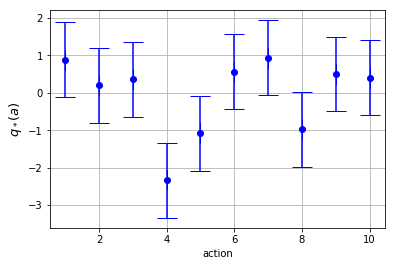

In [9]:
plt.errorbar(action_x,q_fn, xerr=0.0, yerr=sigma, capsize=10, color='b', fmt='o')
plt.xlabel('action')
plt.ylabel(r'$q_*(a)$', fontsize=13)
plt.grid( )

In [13]:
reward_fn=np.random.normal(q_fn, 1.0,k)

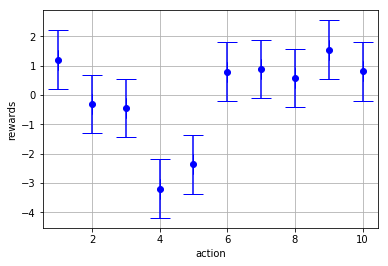

In [14]:
plt.errorbar(action_x, reward_fn, xerr=0.0, yerr=1.0, capsize=10, color='b', fmt='o')
plt.xlabel('action')
plt.ylabel('rewards')
plt.grid()

In [40]:
def bandit_ten_armed(k, q_fn_star):
    reward_fn=np.random.normal(q_fn_star, 1.0,k)# generates 10 points with mean=q_fn(i) and variance 1
    return reward_fn#[action]    

In [41]:
def optimal_action_fn(k, q_fn_star):
    return np.argmax(q_fn_star)

In [44]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr=np.zeros((k,N_steps+1, N_exp))

epsilon=0.1
counter_optimal=np.zeros(N_steps)

for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    ###
    np.random.seed(seedvalue_arr[j])
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    ###
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action_chosen=np.random.randint(0,10) #integers is from [0,10)
            #counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action_chosen=np.random.randint(0,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr[:,i,j]
                action_chosen=np.argmax(Q_fn_temp)  #greedy action #exploitation
        reward_possible=bandit_ten_armed(k,q_fn_star)
        reward_obt=reward_possible[action_chosen]
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            #print j,i,'hi'
            counter_optimal[i]=counter_optimal[i]+1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 #expt realization
        Q_fn_arr[:,i+1,j]=Q_fn_arr[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr[action_chosen,i+1,j]+=(reward_obt-Q_fn_arr[action_chosen,i,j])/N_fn_a[action_chosen]

Q_fn_arr_final=np.mean(Q_fn_arr, axis=2) # avg over N_exp
Q_fn_arr_final=np.mean(Q_fn_arr_final, axis=0) # avg over 10 actions
counter_optimal=100*counter_optimal/N_exp

In [47]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr_small_eps=np.zeros((k,N_steps+1, N_exp))

epsilon=0.01
counter_optimal_small_eps=np.zeros(N_steps)

for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    ###
    np.random.seed(seedvalue_arr[j])
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    ###
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action_chosen=np.random.randint(0,10) #integers is from [0,10)
            #counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action_chosen=np.random.randint(0,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr_small_eps[:,i,j]
                action_chosen=np.argmax(Q_fn_temp)  #greedy action #exploitation
        reward_possible=bandit_ten_armed(k,q_fn_star)
        reward_obt=reward_possible[action_chosen]
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            #print j,i,'hi'
            counter_optimal_small_eps[i]=counter_optimal_small_eps[i]+1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 #expt realization
        Q_fn_arr_small_eps[:,i+1,j]=Q_fn_arr_small_eps[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr_small_eps[action_chosen,i+1,j]+=(reward_obt-Q_fn_arr_small_eps[action_chosen,i,j])/N_fn_a[action_chosen]

Q_fn_arr_final_small_eps=np.mean(Q_fn_arr_small_eps, axis=2) # avg over N_exp
Q_fn_arr_final_small_eps=np.mean(Q_fn_arr_final_small_eps, axis=0) # avg over 10 actions
counter_optimal_small_eps=100*counter_optimal_small_eps/N_exp

In [50]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr_greedy=np.zeros((k,N_steps+1, N_exp))

epsilon=0.0
counter_optimal_greedy=np.zeros(N_steps)

for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    ###
    np.random.seed(seedvalue_arr[j])
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    ###
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action_chosen=np.random.randint(0,10) #integers is from [0,10)
            #counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action_chosen=np.random.randint(0,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr_greedy[:,i,j]
                action_chosen=np.argmax(Q_fn_temp)  #greedy action #exploitation
        reward_possible=bandit_ten_armed(k,q_fn_star)
        reward_obt=reward_possible[action_chosen]
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            #print j,i,'hi'
            counter_optimal_greedy[i]=counter_optimal_greedy[i]+1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 #expt realization
        Q_fn_arr_greedy[:,i+1,j]=Q_fn_arr_greedy[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr_greedy[action_chosen,i+1,j]+=(reward_obt-Q_fn_arr_greedy[action_chosen,i,j])/N_fn_a[action_chosen]

Q_fn_arr_final_greedy=np.mean(Q_fn_arr_greedy, axis=2) # avg over N_exp
Q_fn_arr_final_greedy=np.mean(Q_fn_arr_final_greedy, axis=0) # avg over 10 actions
counter_optimal_greedy=100*counter_optimal_greedy/N_exp

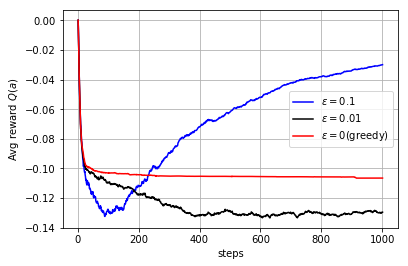

In [55]:
x=np.linspace(1,N_steps+1,N_steps+1)
plt.plot(x, Q_fn_arr_final, 'b-', label=r'$\epsilon=0.1$')
plt.plot(x, Q_fn_arr_final_small_eps, 'k-',label=r'$\epsilon=0.01$')
plt.plot(x, Q_fn_arr_final_greedy, 'r-', label=r'$\epsilon=0$(greedy)')
plt.xlabel('steps')
plt.ylabel('Avg reward $Q(a)$')
plt.grid()
plt.legend(loc='best')
plt.savefig('reward_neg_new.eps')

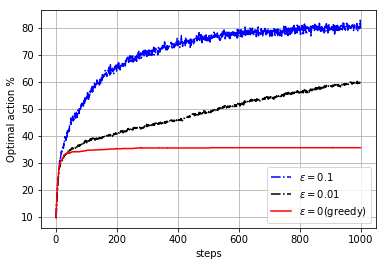

In [56]:
x=np.linspace(1,N_steps,N_steps)
plt.plot(x, counter_optimal, 'b-.', label=r'$\epsilon=0.1$')
plt.plot(x, counter_optimal_small_eps, 'k-.',label=r'$\epsilon=0.01$')
plt.plot(x, counter_optimal_greedy, 'r-',  label=r'$\epsilon=0$(greedy)')
plt.xlabel('steps')
plt.ylabel(r'Optimal action %')
plt.grid()
plt.legend(loc='best')
plt.savefig('optimal_neg_reward_new.eps')

## Bandit problem with positive average reward

In [201]:
mu, sigma = 0, 1.0 # mean and standard deviation
np.random.seed(200)
nmax=10
q_fn= np.random.normal(mu, sigma, nmax)
action_x= np.linspace(1,nmax,nmax)

In [202]:
np.mean(q_fn)

0.16086389302546783

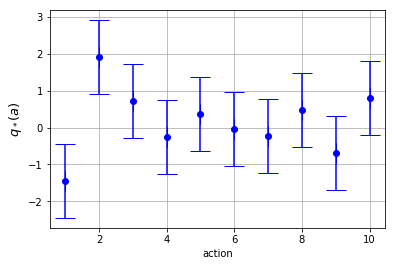

In [203]:
plt.errorbar(action_x, q_fn, xerr=0.0, yerr=sigma, capsize=10, color='b', fmt='o')
plt.xlabel('action')
plt.ylabel(r'$q_*(a)$', fontsize=13)
plt.grid()

In [204]:
mu, sigma = 0, 1.0 # mean and standard deviation
np.random.seed(200)
nmax=10
q_fn_star= np.random.normal(mu, sigma, nmax)#actual q_fn_star
action_x= np.linspace(1,nmax,nmax, dtype=int)
def bandit_ten_armed_pos(action,q_fn_star):
    reward_fn=np.random.normal(q_fn, 1.0,len(q_fn))# generates 10 points with mean=q_fn(i) and variance 1
    return reward_fn[action]  

In [205]:
k=10
N_steps=1000
N_exp=1000

Q_fn_arr_pos=np.zeros((k,N_steps+1, N_exp))
epsilon=0.1
counter=0
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    for i in range(N_steps):
        p=np.random.uniform(0,1.0)
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action=np.random.randint(1,10)
            counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action=np.random.randint(1,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr_pos[:,i,j]
                action=np.argmax(Q_fn_temp) #greedy action #exploitation
        reward=bandit_ten_armed_pos(action,q_fn_star)
        N_fn_a[action]+=1
        Q_fn_arr_pos[:,i+1,j]=Q_fn_arr_pos[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr_pos[action,i+1,j]+=(reward-Q_fn_arr_pos[action,i,j])/N_fn_a[action]

Q_fn_arr_final_pos=np.mean(Q_fn_arr_pos, axis=2) # avg over N_exp
Q_fn_arr_final_pos=np.mean(Q_fn_arr_final_pos, axis=0) # avg over 10 actions

In [210]:
k=10
N_steps=1000
N_exp=1000

Q_fn_arr_small_eps_pos=np.zeros((k,N_steps+1, N_exp))
epsilon=0.01
counter=0
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    for i in range(N_steps):
        p=np.random.uniform(0,1.0)
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action=np.random.randint(1,10)
            counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action=np.random.randint(1,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr_small_eps_pos[:,i,j]
                action=np.argmax(Q_fn_temp) #greedy action #exploitation
        reward=bandit_ten_armed_pos(action,q_fn_star)
        N_fn_a[action]+=1
        Q_fn_arr_small_eps_pos[:,i+1,j]=Q_fn_arr_small_eps_pos[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr_small_eps_pos[action,i+1,j]+=(reward-Q_fn_arr_small_eps_pos[action,i,j])/N_fn_a[action]

Q_fn_arr_small_eps_final_pos=np.mean(Q_fn_arr_small_eps_pos, axis=2) # avg over N_exp
Q_fn_arr_small_eps_final_pos=np.mean(Q_fn_arr_small_eps_final_pos, axis=0) # avg over 10 actions

In [212]:
k=10
N_steps=1000
N_exp=1000

Q_fn_arr_greedy_pos=np.zeros((k,N_steps+1, N_exp))
epsilon=0.0
counter=0
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    for i in range(N_steps):
        p=np.random.uniform(0,1.0)
        #print 'Q', Q_fn_arr[:,i]
        #print 'N', N_fn_a
        if p < epsilon: #prob epsilon #exploration
            action=np.random.randint(1,10)
            counter+=1
        #    print 'epsilon', counter, action
        else: #prob 1-epsilon
            if i==0:
                action=np.random.randint(1,10) #first step every Q(a) would be zero
            else:
                Q_fn_temp=Q_fn_arr_greedy_pos[:,i,j]
                action=np.argmax(Q_fn_temp) #greedy action #exploitation
        reward=bandit_ten_armed_pos(action,q_fn_star)
        N_fn_a[action]+=1
        Q_fn_arr_greedy_pos[:,i+1,j]=Q_fn_arr_greedy_pos[:,i,j]# we should not forget reward estimate for previous step
        Q_fn_arr_greedy_pos[action,i+1,j]+=(reward-Q_fn_arr_greedy_pos[action,i,j])/N_fn_a[action]

Q_fn_arr_greedy_final_pos=np.mean(Q_fn_arr_greedy_pos, axis=2) # avg over N_exp
Q_fn_arr_greedy__final_pos=np.mean(Q_fn_arr_greedy_final_pos, axis=0) # avg over 10 actions

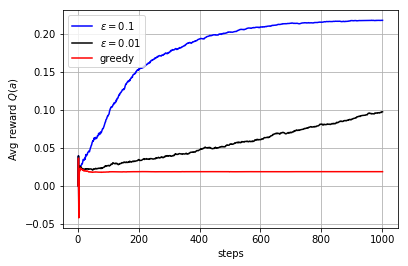

In [214]:
x=np.linspace(1,N_steps+1,N_steps+1)
plt.plot(x, Q_fn_arr_final_pos, 'b-', label=r'$\epsilon=0.1$')
plt.plot(x, Q_fn_arr_small_eps_final_pos, 'k-',label=r'$\epsilon=0.01$')
plt.plot(x, Q_fn_arr_greedy__final_pos, 'r-', label=r'greedy')
plt.xlabel('steps')
plt.ylabel('Avg reward $Q(a)$')
plt.grid()
plt.legend(loc='best')
plt.savefig('reward_pos.eps')

In [207]:
Q_fn_arr_final_pos[0]

0.0